# MALIGNANT COMMENTS CLASSIFICATION

# Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as inoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   


The data set includes:
    
    Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
    Highly Malignant: It denotes comments that are highly malignant and hurtful. 
    Rude: It denotes comments that are very rude and offensive.
    Threat: It contains indication of the comments that are giving any threat to someone. 	
    Abuse: It is for comments that are abusive in nature. 
    Loathe: It describes the comments which are hateful and loathing in nature.  
    ID: It includes unique Ids associated with each comment text given.   
    Comment text: This column contains the comments extracted from various social media platforms. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mcc=pd.read_csv('Documents/train.csv')

In [3]:
mcc

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
mcc.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
mcc.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
mcc.sample(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
82020,db6cb1b5ae65dfcb,—Preceding unsigned comment added by 74.37.110...,0,0,0,0,0,0
85918,e5cced2b0b03dce8,"""\n\nWikipedia Regrets The Errors\n\nFrom June...",0,0,0,0,0,0
122828,9103eac61f75dbd0,""":::Since we are writing an encyclopedia artic...",0,0,0,0,0,0
85166,e3d5b54d7707ca6c,Energy use in society includes sources of ene...,0,0,0,0,0,0
40198,6b4c04c34c84b940,"""\nIt would have been polite, yes. ''' 24/7'''...",0,0,0,0,0,0


In [7]:
mcc.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [8]:
mcc.shape

(159571, 8)

In [9]:
mcc.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [10]:
mcc.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
mcc=pd.DataFrame(data=mcc)

In [12]:
mcc

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [13]:
mcc.isnull()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


In [14]:
mcc.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [15]:
mcc2=pd.read_csv('Documents/test.csv')

In [16]:
mcc2

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [17]:
mcc2.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [18]:
mcc2.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [19]:
mcc2.sample(5)

,id,comment_text
139885,e9dfbb444bc9142c,:You have repeatedly added it after I removed ...
82451,89879f7114a89baa,lick poopy butts. D
96594,a12cbd492fee1e93,""" \n\n == Factual accuracy and sources == \n\n..."
5393,0914142b82c843a4,::::I opened a section on the noticeboard for ...
81170,8781df8c1352543a,"*First, let's see you present some evidence th..."


In [20]:
mcc2.dtypes

id              object
comment_text    object
dtype: object

In [21]:
mcc2.shape

(153164, 2)

In [22]:
mcc2.columns

Index(['id', 'comment_text'], dtype='object')

In [23]:
mcc2.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,e40fc7ff862fa1fc,"that it isn't, or how"
freq,1,1


In [24]:
mcc2.isnull()

,id,comment_text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
153159,False,False
153160,False,False
153161,False,False
153162,False,False


In [25]:
mcc2.isnull().sum()

id              0
comment_text    0
dtype: int64

In [26]:
mcc.isnull().sum().any()

False

In [27]:
mcc2.isnull().sum().any()

False

In [28]:
mcc['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# Exploration of Target Variables

In [29]:
Categorical = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [30]:
for i in mcc.columns[2:]:
    print('Value Counts of',i)
    print(mcc[i].value_counts())
    print('='*100)

Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64


# Exploratory Data Analysis (EDA)

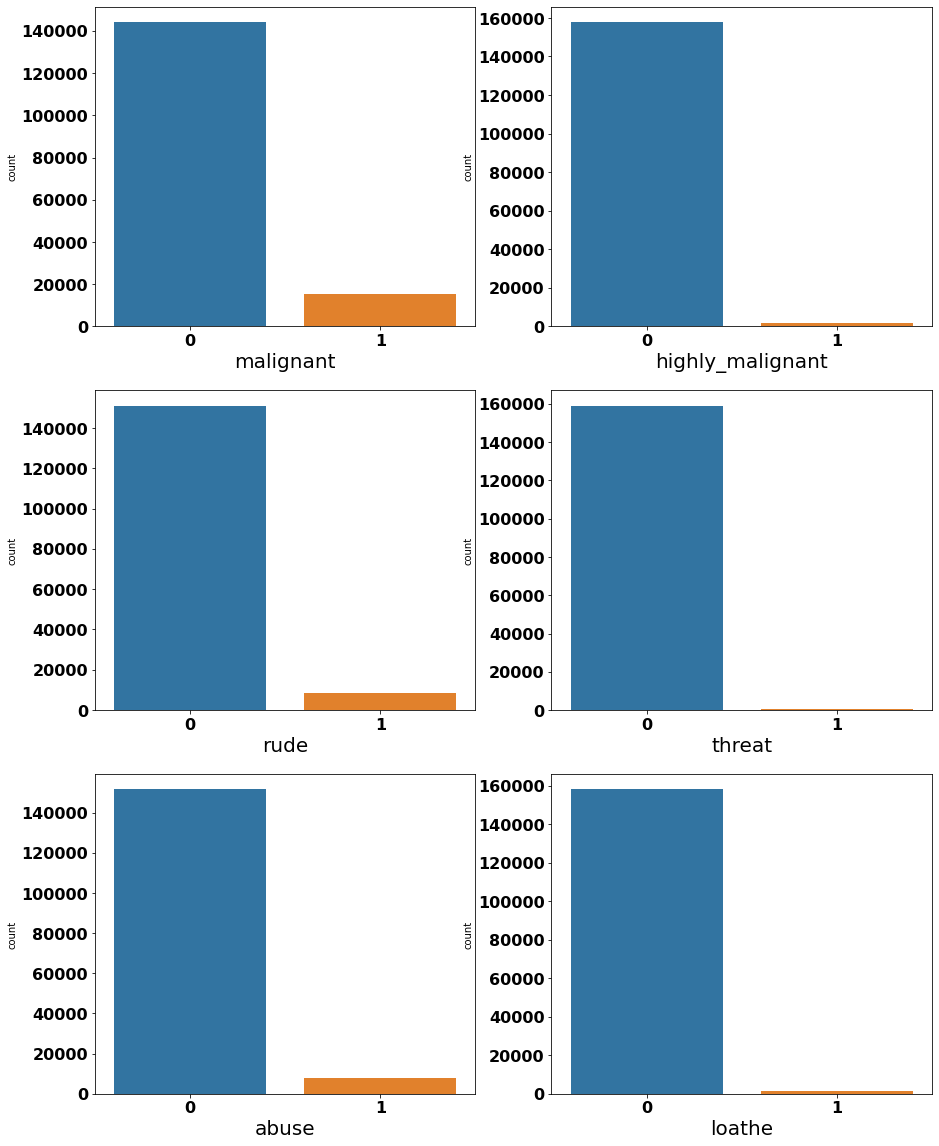

In [31]:
categories=mcc.columns[2:]
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for col in categories:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(mcc[col])
        plt.xlabel(col,fontsize=20)
        plt.xticks(fontsize=16,fontweight ='bold')
        plt.yticks(fontsize=16,fontweight ='bold')
    plotnumber += 1
plt.show()

While maximum Negative comments categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum.

In [32]:
none = mcc[(mcc['malignant']!=1) & (mcc['highly_malignant']!=1) & (mcc['rude']!=1) & 
                            (mcc['threat']!=1) & (mcc['abuse']!=1) & (mcc['loathe']!=1)]
percent=len(none)/len(mcc)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.

In [33]:
data_count = mcc.iloc[:,2:].sum()

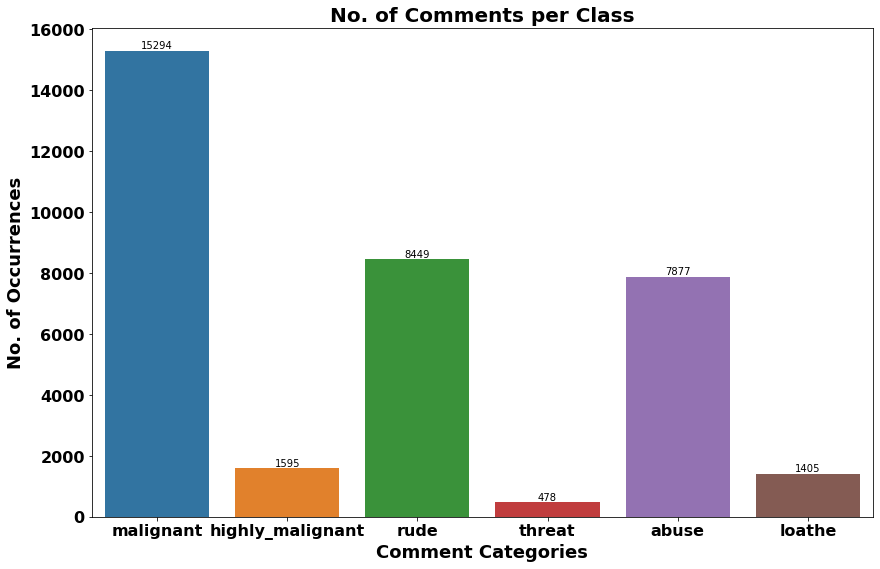

In [34]:
plt.figure(figsize=(14,9))

ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=18,fontweight='bold')
plt.xlabel('Comment Categories', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Out of total Negative comments the maximum negative comments comes with Malignant in nature followed by rude categories.

Very few comments comes with threatening nataure.

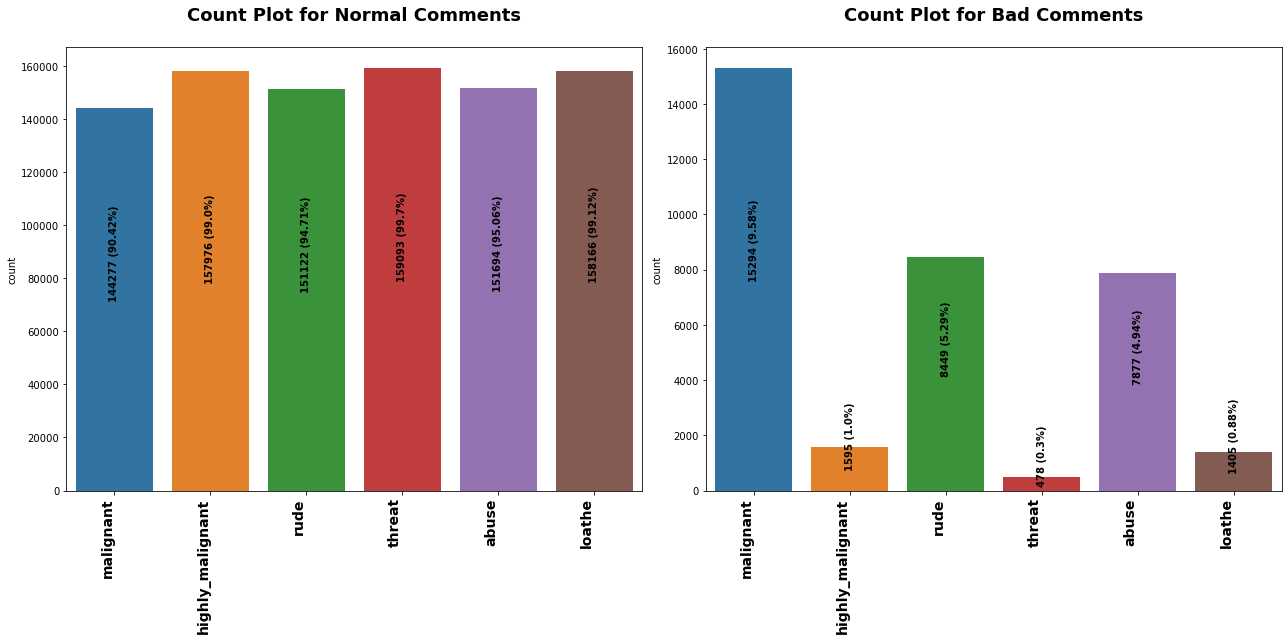

In [35]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

for i in range(2):
    sns.countplot(data=mcc[mcc.columns[2:]][mcc[mcc.columns[2:]]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n", fontsize=18, fontweight='bold')
    else:
        ax[i].set_title("Count Plot for Bad Comments\n", fontsize=18, fontweight='bold')
        
    ax[i].set_xticklabels(mcc.columns[2:], rotation=90, ha="right", fontsize=14, fontweight='bold')
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(mcc),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1
plt.tight_layout()
plt.show()

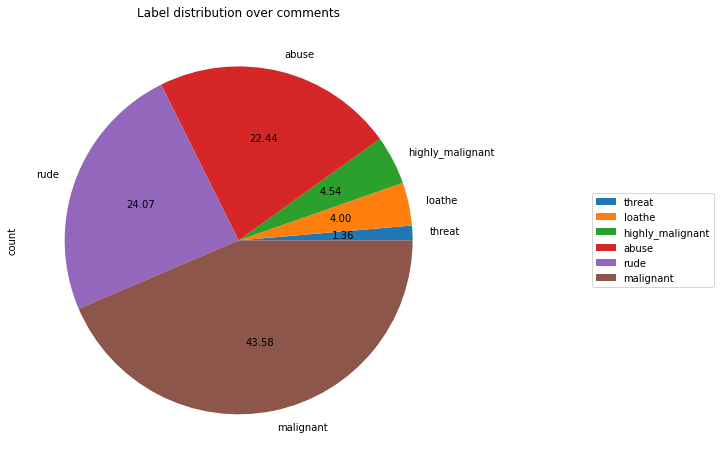

In [36]:
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
mcc_distribution = mcc[mcc.columns[2:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

mcc_distribution.plot.pie(y = 'count', title = 'Label distribution over comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

# Observation :
    
Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.

Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.

In [37]:
comment_len = mcc.comment_text.str.len()
mcc.comment_text.str.len().median()

205.0

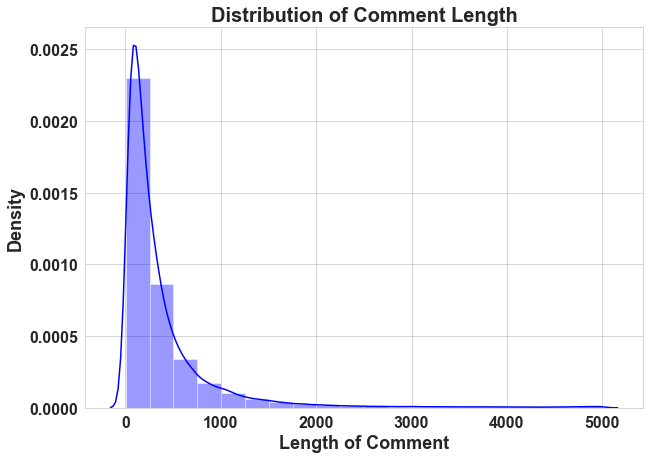

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = mcc.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. 

Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

In [39]:
corr=mcc.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


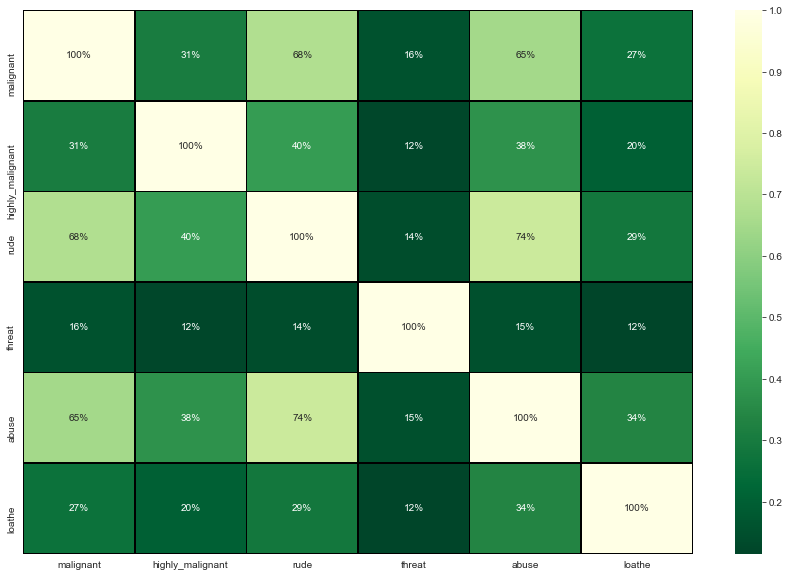

In [40]:
plt.figure(figsize=(15, 10))
corr = mcc.corr() 
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.

Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.

Almost all variable are correlated with each other negatively.*

# Data pre-processing

In [41]:
mcc.drop('id',axis=1,inplace=True)
mcc2.drop('id',axis=1,inplace=True)

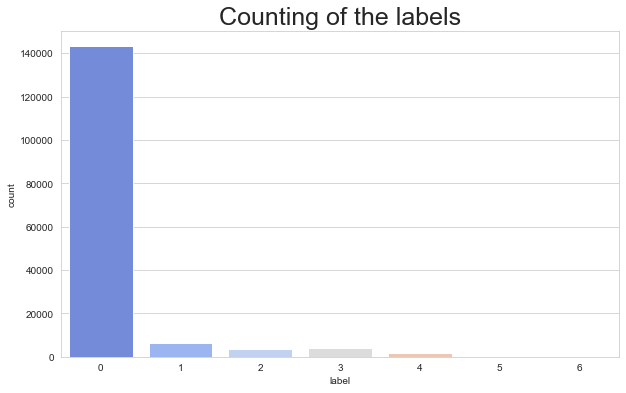

In [42]:
mcc['label']=mcc[comments_labels].sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(mcc['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

Feature Extraction for length before cleaning in training dataset.

In [43]:
mcc['length_before_cleaning'] = mcc['comment_text'].map(lambda comment_text: len(comment_text))
mcc

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [44]:
mcc2['length_before_cleaning'] = mcc2['comment_text'].map(lambda comment_text: len(comment_text))
mcc2.head(5)

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


# Text Mining
Operation perform are as followed:

Removing Punctuations and other special characters

Word Tokenzation

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

In [45]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [47]:
mcc['comment_text'] = mcc['comment_text'].replace('\n',' ')

In [48]:
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
     #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [49]:
mcc['comment_text'] = mcc['comment_text'].apply(clean_comments)
mcc['comment_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [50]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
mcc['length_after_cleaning'] = mcc['comment_text'].map(lambda comment_text: len(comment_text))
mcc.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,length_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing.

In [51]:
# Checking Total length removal in train dataset
print("Original Length:", mcc.length_before_cleaning.sum())
print("Cleaned Length:", mcc.length_after_cleaning.sum())
print("Total Words Removed:", (mcc.length_before_cleaning.sum()) - (mcc.length_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [52]:
# Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
mcc2['comment_text'] = mcc2['comment_text'].apply(clean_comments)
mcc2['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [53]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
mcc2['length_after_cleaning'] = mcc2['comment_text'].map(lambda comment_text: len(comment_text))
mcc2.head()

,comment_text,length_before_cleaning,length_after_cleaning
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [54]:
# Total length removal in test dataset
print('Original Length:',mcc2.length_before_cleaning.sum())
print('Clean Length:',mcc2.length_after_cleaning.sum())
print("Total Words Removed:", (mcc2.length_before_cleaning.sum()) - (mcc2.length_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


# Word Cloud for different Target Feature

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Word Cloud for WORDS TAGGED AS MALIGNANT

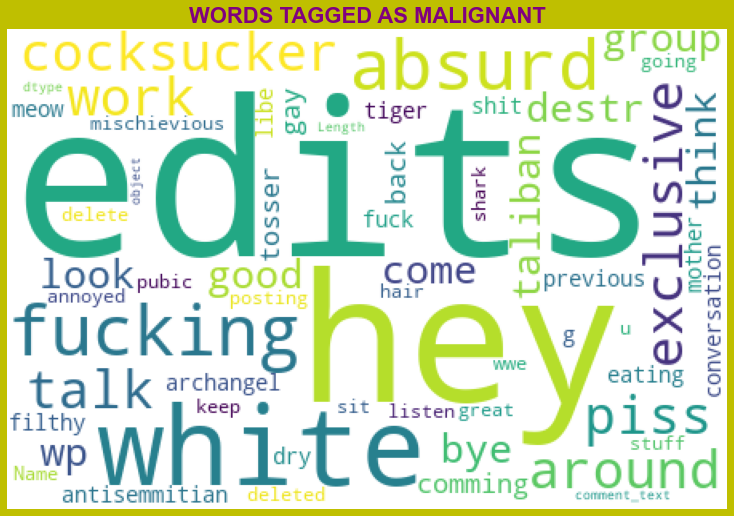

In [55]:
# Plotting for malignant
mcc_malignant=mcc[(mcc['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of malignant comments, it is clear that it mostly consists of words like edits, hey, white, fucking, gay, cocksucker, work, think, taliban ect.

# Word Cloud for WORDS TAGGED AS HIGHLY MALIGNANT

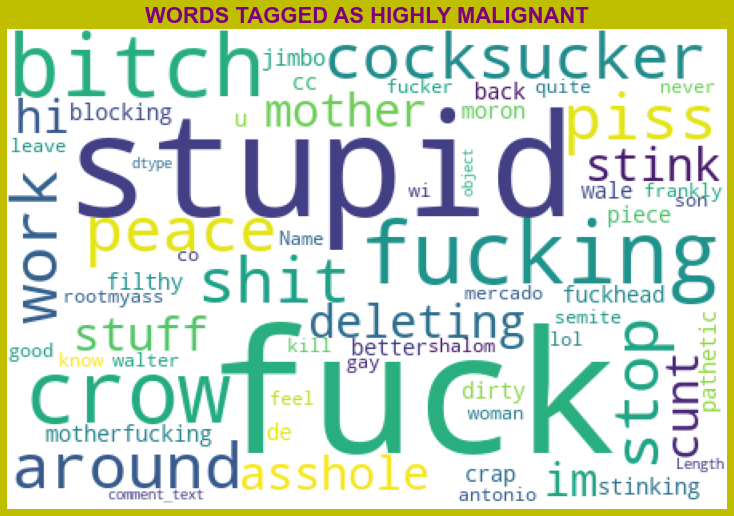

In [56]:
# Plotting for highly_malignant
mcc_highlymalignant=mcc[(mcc['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Highly malignant comments, it is clear that it mostly consists of words like fuck, stupid, fucking, bitch, crow, shit, cocksucker etc.

# Word Cloud for WORDS TAGGED AS RUDE

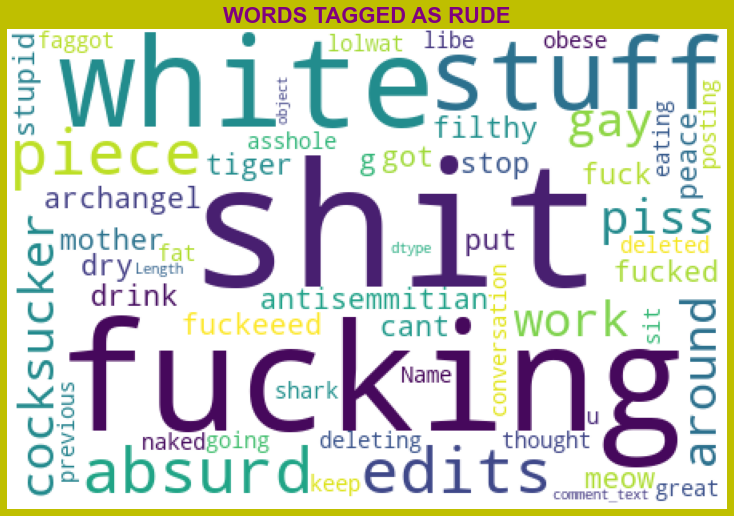

In [57]:
# Plotting for rude
mcc_rude=mcc[(mcc['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Rude comments, it is clear that it mostly consists of words like fucking, shit, white, piece, edits, stuff, absurd etc.

# Word Cloud for WORDS TAGGED AS THREAT

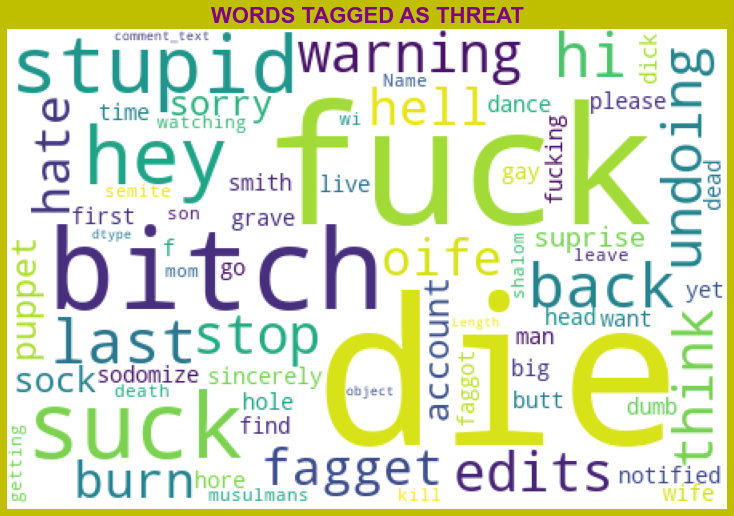

In [58]:
# Plotting for threat
mcc_threat=mcc[(mcc['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Threat comments, it is clear that it mostly consists of words like fuck,suck, Bitch, die, stupid, etc.

# Word Cloud for WORDS TAGGED AS ABUSE

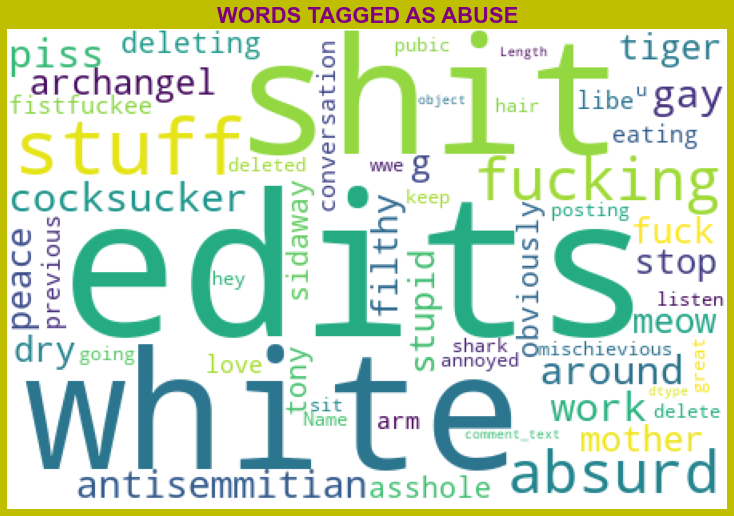

In [59]:
# Plotting for abuse
mcc_abuse=mcc[(mcc['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Abuse comments, it is clear that it mostly consists of words like edits, white, shit, stuff, fuck, piss, fucking etc.

# Word Cloud for WORDS TAGGED AS LOATHE

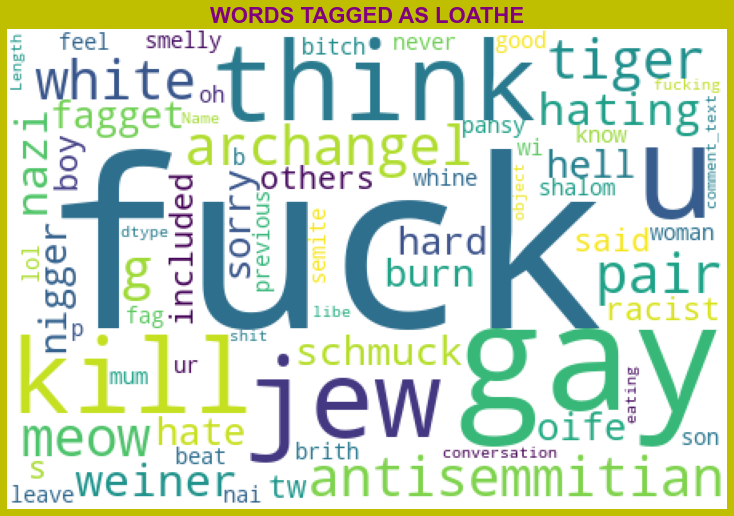

In [60]:
# Plotting for loathe
mcc_loathe=mcc[(mcc['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(mcc_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Loathe comments, it is clear that it mostly consists of words like fuck,gay, kill, think, jew, u etc.

# Separating independent and dependent variables

# 1. Vectorizer & Spliting Train dataset

In [61]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [62]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
x = tf_vec.fit_transform(mcc['comment_text']).toarray()

In [63]:
output_labels= mcc.columns[1:7]

In [64]:
# output variables
from scipy.sparse import csr_matrix
y = csr_matrix(mcc[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", x.shape)
print("Output Variable Shape:", y.shape)

Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


# 2. Vectorizer & Spliting Train dataset

In [65]:
# Doing the above process for test data 
test_vec = tf_vec.fit_transform(mcc2['comment_text'])
test_vec

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2138199 stored elements in Compressed Sparse Row format>

In [66]:
test_vec.shape

(153164, 2000)

# Machine Learning Model Building

In [67]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [68]:
import timeit, sys
import tqdm.notebook as tqdm

In [69]:
# 3. Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [70]:
# Preparing the list of models for classification purpose
models = {
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
         }

# Taking one forth of the total data for training and testing purpose
half = len(mcc)//4
trained_models = build_models(models,x[:half,:],y[:half,:])

Building Models:   0%|          | 0/4 [00:00<?, ?it/s]


Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.022066084314470186
	Accuracy Score: 0.9123433345993164
              precision    recall  f1-score   support

           0       0.92      0.51      0.66      1281
           1       0.61      0.18      0.28       150
           2       0.95      0.54      0.69       724
           3       0.00      0.00      0.00        44
           4       0.81      0.45      0.58       650
           5       0.88      0.13      0.22       109

   micro avg       0.89      0.47      0.61      2958
   macro avg       0.70      0.30      0.40      2958
weighted avg       0.87      0.47      0.60      2958
 samples avg       0.05      0.04      0.04      2958
Completed in [21.376779999999997 sec.]

Current Model in Progress: Random Forest Classifier 
Training:  BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True

# Hyperparameter Tuning

In [71]:
from sklearn.model_selection import  GridSearchCV

In [72]:
fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111] }
#SVC = BinaryRelevance(classifier=LinearSVC(),require_dense=[True,True])           
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3,verbose = 10)
x_train,x_test,y_train,y_test = train_test_split(x[:half,:], y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 1/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.1s
[CV 2/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 2/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.2s
[CV 3/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 3/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.1s
[CV 1/3; 2/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=7

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

# Final Model

In [73]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='ovr', penalty='l2', random_state=42))

Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.26002673796792
Hamming loss for the Best Model is: 2.0819407308377897


Final Model is giving us Accuracy score of 91.26% which is slightly improved compare to earlier Accuracy score of 91.15%.

# AOC - ROC Curve of Final Model

In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10720    73]
  [  507   668]]

 [[11833     0]
  [  135     0]]

 [[11268    42]
  [  231   427]]

 [[11930     0]
  [   38     0]]

 [[11274    98]
  [  289   307]]

 [[11869     3]
  [   79    17]]]


# Model Saving or Serialization

In [75]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
import joblib
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

# Test Dataset Predictions

In [76]:
# saving the best classification model
import joblib
best_model = joblib.load('Malignant_comments_classifier.pkl')
#joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

In [77]:
test_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
# Make predictions and view the results
predict_test = best_model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')

In [ ]:
df.to_csv('test_dataset_predictions2.csv', index=False)